# daft できれいにグラフィカルモデルを描く


pptの挿絵用にきれいにグラフィカルモデルを描きたい。
Pythonでは[daft](http://daft-pgm.org/)というパッケージで描けるようなのでやってみた。

参考:https://nzw0301.github.io/2016/02/daft

In [412]:
import daft
from matplotlib import rc
%matplotlib inline

### Latent Dirichlet Allocation

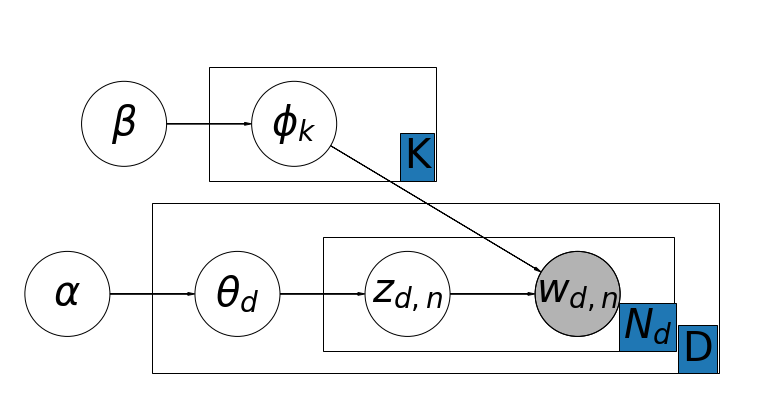

In [494]:
rc("font", family="sans-serif", size=40)

# PGM Object
pgm = daft.PGM(shape=[13, 7], node_unit = 3)

# Nodes  名前, ラベル， 座標
pgm.add_node(daft.Node("beta", r"$\beta$", 2, 5))
pgm.add_node(daft.Node("phi", r"$\phi_k$", 5, 5))

pgm.add_node(daft.Node("alpha", r"$\alpha$", 1, 2)) 
pgm.add_node(daft.Node("theta", r"$\theta_d$", 4, 2))
pgm.add_node(daft.Node("z", r"$z_{d,n}$", 7, 2))
pgm.add_node(daft.Node("w", r"$w_{d,n}$", 10, 2, observed=True))

# Edges node1 →　node2
pgm.add_edge("alpha", "theta")
pgm.add_edge("theta", "z")
pgm.add_edge("z", "w")
pgm.add_edge("beta", "phi")
pgm.add_edge("phi", "w")

# plate 
pgm.add_plate(daft.Plate([3.5, 4, 4, 2], label_offset =[195, 13], label=r"K"))
pgm.add_plate(daft.Plate([5.5, 1, 6.2, 2], label_offset =[300, 13], label=r"$N_d$"))
pgm.add_plate(daft.Plate([2.5, 0.6, 10, 3], label_offset =[530,13], label=r"D"))

# Rendering
pgm.render()
pgm.figure.savefig("lda.pdf")

### Topic Tracking Model 

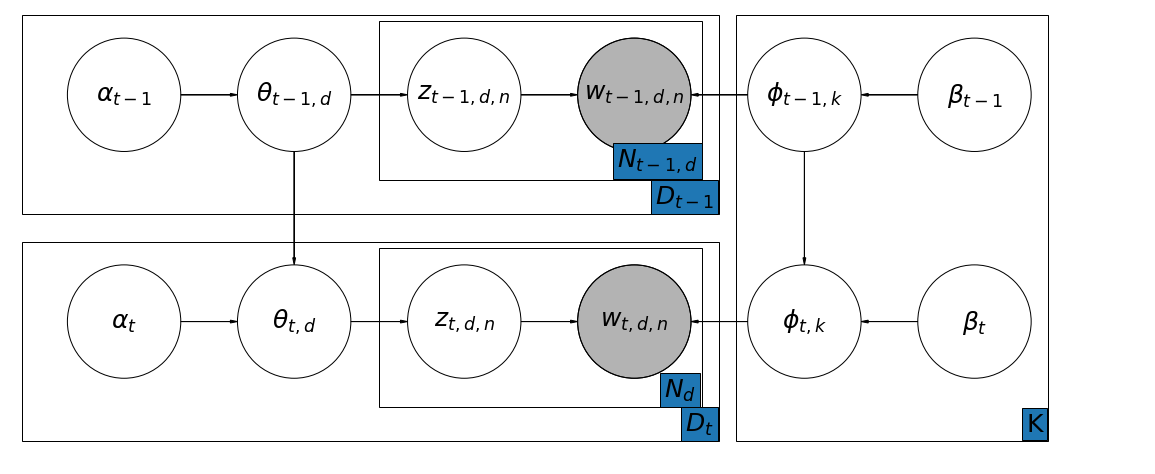

In [519]:
rc("font", family="sans-serif", size=25)

# PGM Object
pgm = daft.PGM(shape=[20, 8], node_unit = 4)

# Nodes  名前, ラベル， 座標
pgm.add_node(daft.Node("alpha_t-1", r"$\alpha_{t-1}$", 2, 6.5)) 
pgm.add_node(daft.Node("theta_t-1", r"$\theta_{t-1,d}$", 5, 6.5))
pgm.add_node(daft.Node("z_t-1", r"$z_{t-1,d,n}$", 8, 6.5))
pgm.add_node(daft.Node("w_t-1", r"$w_{t-1,d,n}$", 11, 6.5, observed=True))
pgm.add_node(daft.Node("phi_t-1", r"$\phi_{t-1,k}$", 14, 6.5))
pgm.add_node(daft.Node("beta_t-1", r"$\beta_{t-1}$", 17, 6.5))

pgm.add_node(daft.Node("alpha_t", r"$\alpha_{t}$", 2, 2.5)) 
pgm.add_node(daft.Node("theta_t", r"$\theta_{t,d}$", 5, 2.5))
pgm.add_node(daft.Node("z_t", r"$z_{t,d,n}$", 8, 2.5))
pgm.add_node(daft.Node("w_t", r"$w_{t,d,n}$", 11, 2.5, observed=True))
pgm.add_node(daft.Node("phi_t", r"$\phi_{t,k}$", 14, 2.5))
pgm.add_node(daft.Node("beta_t", r"$\beta_{t}$", 17, 2.5))

# Edges node1 →　node2
pgm.add_edge("alpha_t-1", "theta_t-1")
pgm.add_edge("theta_t-1", "z_t-1")
pgm.add_edge("z_t-1", "w_t-1")
pgm.add_edge("beta_t-1", "phi_t-1")
pgm.add_edge("phi_t-1", "w_t-1")

pgm.add_edge("alpha_t", "theta_t")
pgm.add_edge("theta_t", "z_t")
pgm.add_edge("z_t", "w_t")
pgm.add_edge("beta_t", "phi_t")
pgm.add_edge("phi_t", "w_t")

pgm.add_edge("theta_t-1", "theta_t")
pgm.add_edge("phi_t-1", "phi_t")

# plate 
pgm.add_plate(daft.Plate([0.2, 4.4, 12.3, 3.5], label_offset =[633,10], label=r"$D_{t-1}$"))
pgm.add_plate(daft.Plate([6.5, 5, 5.7, 2.8], label_offset =[238, 13], label=r"$N_{t-1,d}$"))

pgm.add_plate(daft.Plate([0.2, 0.4, 12.3, 3.5], label_offset =[663,10], label=r"$D_{t}$"))
pgm.add_plate(daft.Plate([6.5, 1, 5.7, 2.8], label_offset =[285, 10], label=r"$N_d$"))

pgm.add_plate(daft.Plate([12.8, 0.4, 5.5, 7.5], label_offset =[290, 10], label=r"K"))

# Rendering
pgm.render()
pgm.figure.savefig("ttm.pdf")

### Topic Tracking Model with long term dependences

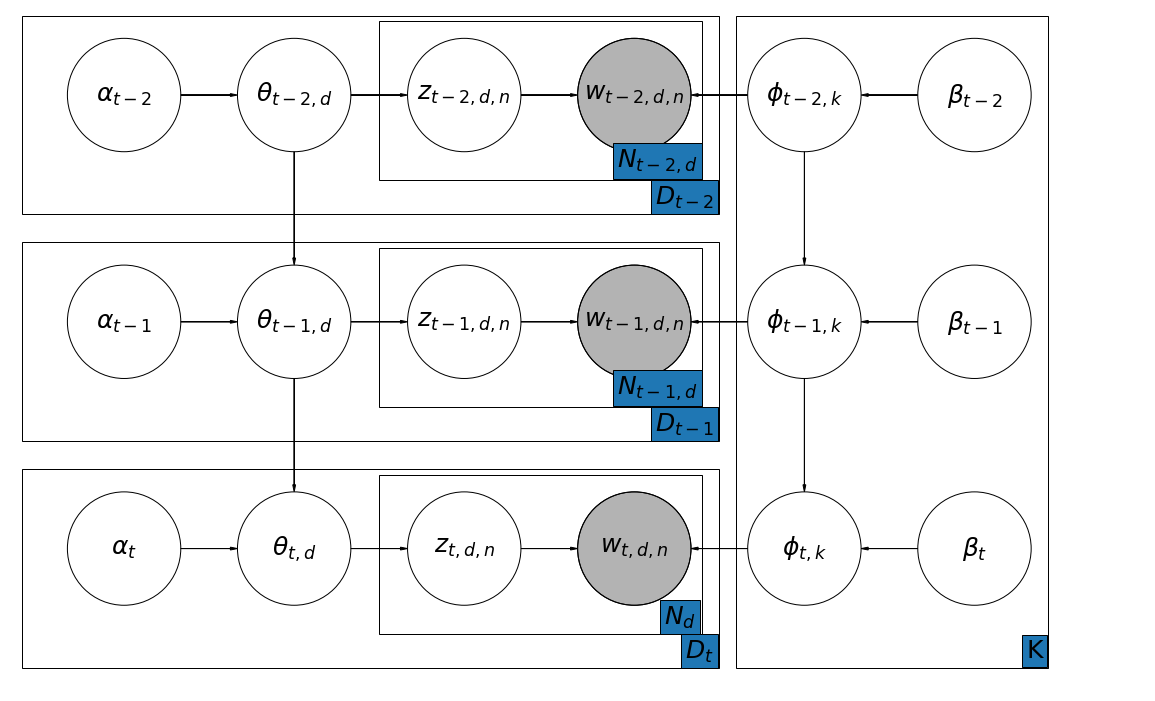

In [518]:
rc("font", family="sans-serif", size=25)

# PGM Object
pgm = daft.PGM(shape=[20, 12], node_unit = 4)

# Nodes  名前, ラベル， 座標
pgm.add_node(daft.Node("alpha_t-2", r"$\alpha_{t-2}$", 2, 10.5)) 
pgm.add_node(daft.Node("theta_t-2", r"$\theta_{t-2,d}$", 5, 10.5))
pgm.add_node(daft.Node("z_t-2", r"$z_{t-2,d,n}$", 8, 10.5))
pgm.add_node(daft.Node("w_t-2", r"$w_{t-2,d,n}$", 11, 10.5, observed=True))
pgm.add_node(daft.Node("phi_t-2", r"$\phi_{t-2,k}$", 14, 10.5))
pgm.add_node(daft.Node("beta_t-2", r"$\beta_{t-2}$", 17, 10.5))

pgm.add_node(daft.Node("alpha_t-1", r"$\alpha_{t-1}$", 2, 6.5)) 
pgm.add_node(daft.Node("theta_t-1", r"$\theta_{t-1,d}$", 5, 6.5))
pgm.add_node(daft.Node("z_t-1", r"$z_{t-1,d,n}$", 8, 6.5))
pgm.add_node(daft.Node("w_t-1", r"$w_{t-1,d,n}$", 11, 6.5, observed=True))
pgm.add_node(daft.Node("phi_t-1", r"$\phi_{t-1,k}$", 14, 6.5))
pgm.add_node(daft.Node("beta_t-1", r"$\beta_{t-1}$", 17, 6.5))

pgm.add_node(daft.Node("alpha_t", r"$\alpha_{t}$", 2, 2.5)) 
pgm.add_node(daft.Node("theta_t", r"$\theta_{t,d}$", 5, 2.5))
pgm.add_node(daft.Node("z_t", r"$z_{t,d,n}$", 8, 2.5))
pgm.add_node(daft.Node("w_t", r"$w_{t,d,n}$", 11, 2.5, observed=True))
pgm.add_node(daft.Node("phi_t", r"$\phi_{t,k}$", 14, 2.5))
pgm.add_node(daft.Node("beta_t", r"$\beta_{t}$", 17, 2.5))

# Edges node1 →　node2
pgm.add_edge("alpha_t-2", "theta_t-2")
pgm.add_edge("theta_t-2", "z_t-2")
pgm.add_edge("z_t-2", "w_t-2")
pgm.add_edge("beta_t-2", "phi_t-2")
pgm.add_edge("phi_t-2", "w_t-2")

pgm.add_edge("alpha_t-1", "theta_t-1")
pgm.add_edge("theta_t-1", "z_t-1")
pgm.add_edge("z_t-1", "w_t-1")
pgm.add_edge("beta_t-1", "phi_t-1")
pgm.add_edge("phi_t-1", "w_t-1")

pgm.add_edge("alpha_t", "theta_t")
pgm.add_edge("theta_t", "z_t")
pgm.add_edge("z_t", "w_t")
pgm.add_edge("beta_t", "phi_t")
pgm.add_edge("phi_t", "w_t")

pgm.add_edge("theta_t-2", "theta_t-1")
pgm.add_edge("phi_t-2", "phi_t-1")

pgm.add_edge("theta_t-1", "theta_t")
pgm.add_edge("phi_t-1", "phi_t")


# plate 
pgm.add_plate(daft.Plate([0.2, 8.4, 12.3, 3.5], label_offset =[633,10], label=r"$D_{t-2}$"))
pgm.add_plate(daft.Plate([6.5, 9, 5.7, 2.8], label_offset =[238, 13], label=r"$N_{t-2,d}$"))

pgm.add_plate(daft.Plate([0.2, 4.4, 12.3, 3.5], label_offset =[633,10], label=r"$D_{t-1}$"))
pgm.add_plate(daft.Plate([6.5, 5, 5.7, 2.8], label_offset =[238, 13], label=r"$N_{t-1,d}$"))

pgm.add_plate(daft.Plate([0.2, 0.4, 12.3, 3.5], label_offset =[663,10], label=r"$D_{t}$"))
pgm.add_plate(daft.Plate([6.5, 1, 5.7, 2.8], label_offset =[285, 10], label=r"$N_d$"))

pgm.add_plate(daft.Plate([12.8, 0.4, 5.5, 11.5], label_offset =[290, 10], label=r"K"))

# Rendering
pgm.render()
pgm.figure.savefig("ttm_td.pdf")